In [44]:
# Instagram Reach Analysis

# Import necessary libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [45]:

# Load the data
file_path = r'C:\Users\aiburale\DataspellProjects\Instagram-Reach-Analysis\Instagram_data_by_Bhanu.csv'
data = pd.read_csv(file_path, encoding='latin1')

In [46]:
# Display the first few rows of the data
print("Data preview:")
print(data.head())


Data preview:
   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a 

In [47]:
# Display column names
print("\nColumn names in the dataset:")
print(data.columns)


Column names in the dataset:
Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')


In [48]:
# Define Key Metrics
metrics = ['Impressions', 'From Home', 'From Hashtags', 'From Explore', 'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows']

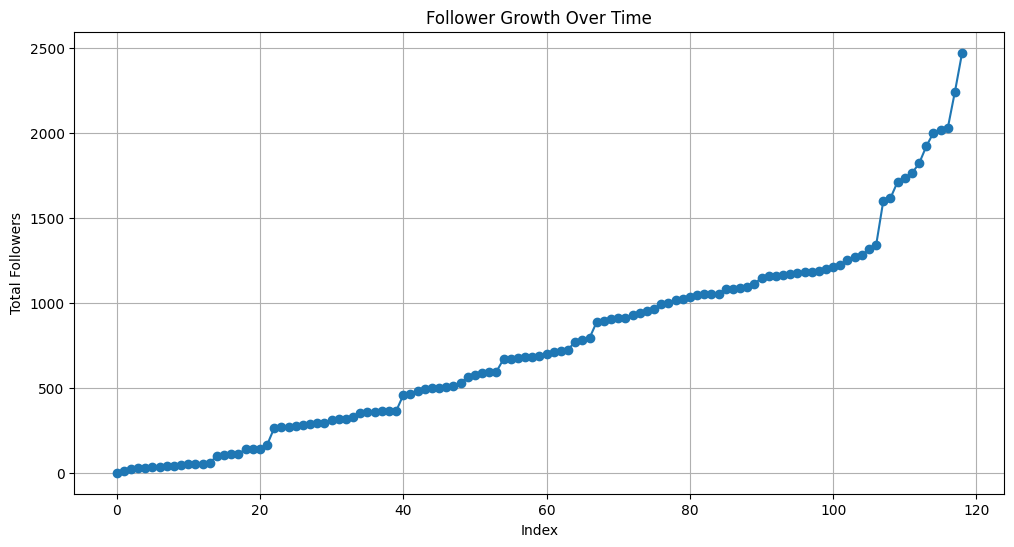

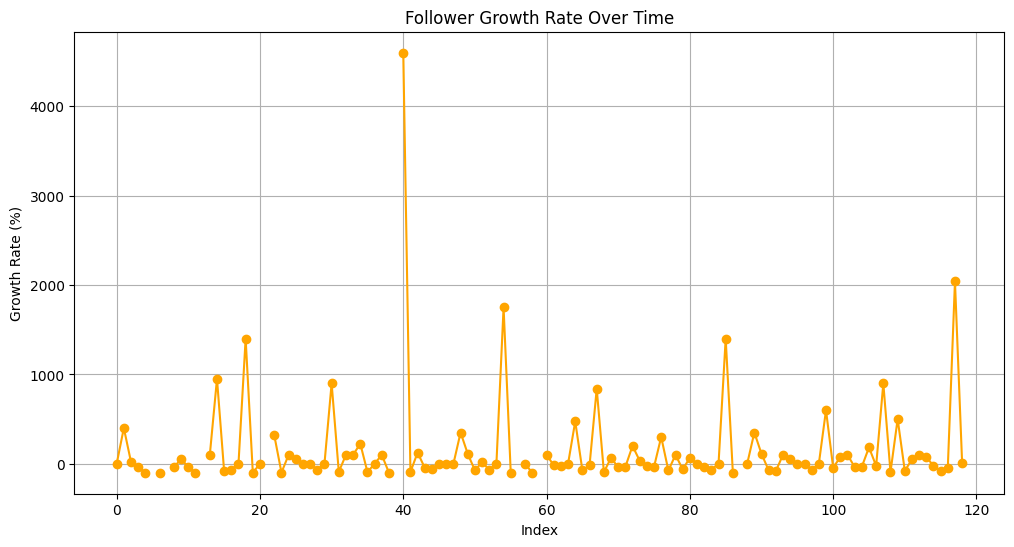

In [49]:
# Analyze Follower Growth
if 'Follows' in data.columns:
    follower_growth = data['Follows'].cumsum()

    plt.figure(figsize=(12, 6))
    plt.plot(follower_growth, marker='o')
    plt.title('Follower Growth Over Time')
    plt.xlabel('Index')
    plt.ylabel('Total Followers')
    plt.grid(True)
    plt.show()

    # Calculate Follower Growth Rate
    follower_growth_rate = data['Follows'].pct_change().fillna(0) * 100

    plt.figure(figsize=(12, 6))
    plt.plot(follower_growth_rate, marker='o', color='orange')
    plt.title('Follower Growth Rate Over Time')
    plt.xlabel('Index')
    plt.ylabel('Growth Rate (%)')
    plt.grid(True)
    plt.show()
else:
    print("The 'Follows' column is missing. Ensure the dataset contains a 'Follows' column for follower growth analysis.")


In [50]:
# Evaluate Post Reach and Impressions
if 'Impressions' in data.columns:
    average_reach_per_post = data['Impressions'].mean()
    total_impressions = data['Impressions'].sum()

    print(f"\nAverage Reach per Post: {average_reach_per_post}")
    print(f"Total Impressions: {total_impressions}")

    # Posts with Highest and Lowest Reach
    highest_reach_post = data['Impressions'].idxmax()
    lowest_reach_post = data['Impressions'].idxmin()

    print(f"Post with Highest Reach: {highest_reach_post}")
    print(f"Post with Lowest Reach: {lowest_reach_post}")
else:
    print("The 'Impressions' column is missing. Ensure the dataset contains an 'Impressions' column for reach analysis.")



Average Reach per Post: 5703.991596638655
Total Impressions: 678775
Post with Highest Reach: 118
Post with Lowest Reach: 39



Average Engagement Rate: 0.03566190712894167


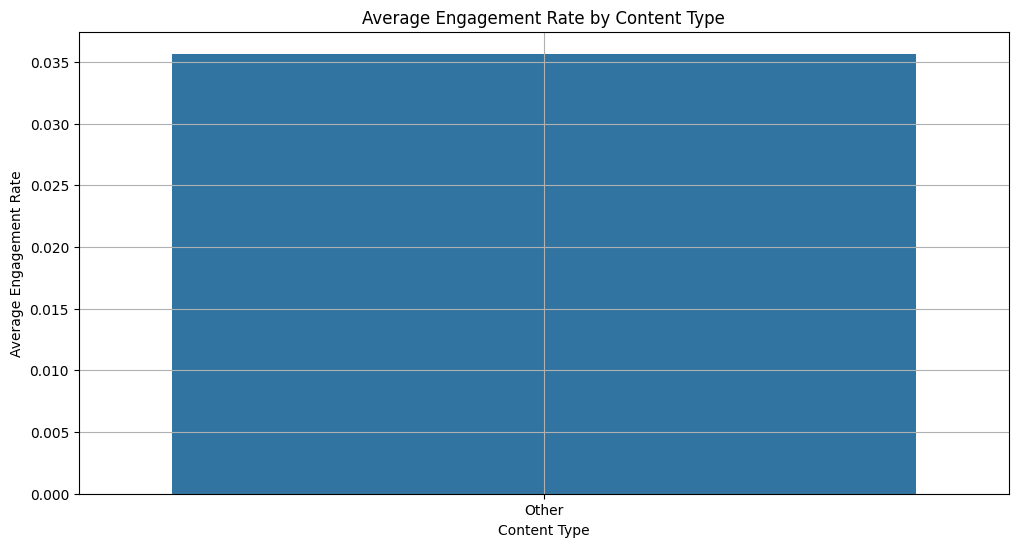

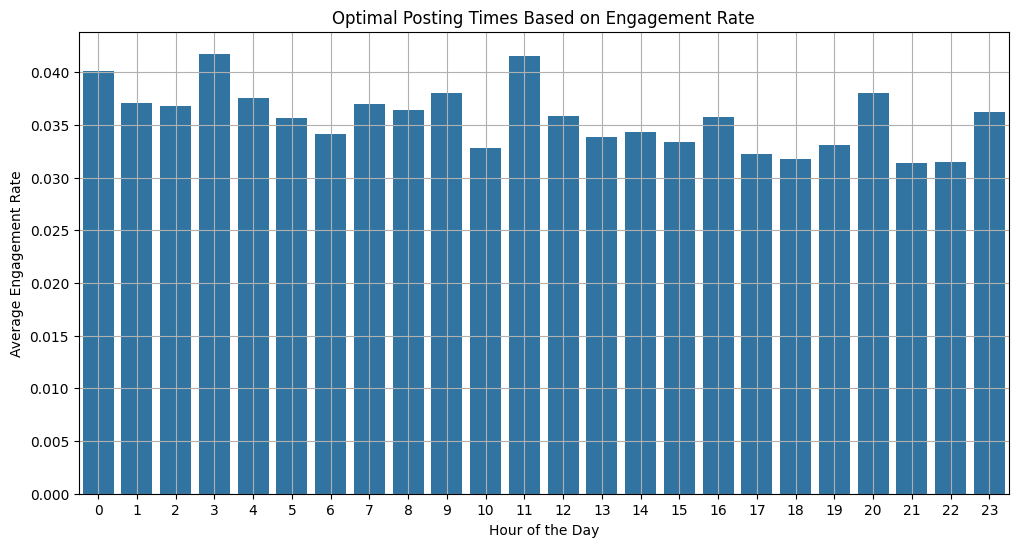

In [51]:
if 'Likes' in data.columns and 'Comments' in data.columns and 'Impressions' in data.columns:
    data['Engagement Rate'] = (data['Likes'] + data['Comments']) / data['Impressions']

    average_engagement_rate = data['Engagement Rate'].mean()
    print(f"\nAverage Engagement Rate: {average_engagement_rate}")

    # Compare Engagement across Different Content Types
    # Simplified classification of content type
    data['Content Type'] = data['Caption'].apply(lambda x: 'Image' if 'image' in x.lower() else 'Video' if 'video' in x.lower() else 'Other')
    content_engagement = data.groupby('Content Type')['Engagement Rate'].mean()

    plt.figure(figsize=(12, 6))
    sns.barplot(x=content_engagement.index, y=content_engagement.values)
    plt.title('Average Engagement Rate by Content Type')
    plt.xlabel('Content Type')
    plt.ylabel('Average Engagement Rate')
    plt.grid(True)
    plt.show()

    # Identify Optimal Posting Times
    # For demonstration, we'll create a dummy 'Hour' column
    data['Hour'] = pd.Series([i % 24 for i in range(len(data))])
    optimal_times = data.groupby('Hour')['Engagement Rate'].mean()

    plt.figure(figsize=(12, 6))
    sns.barplot(x=optimal_times.index, y=optimal_times.values)
    plt.title('Optimal Posting Times Based on Engagement Rate')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Average Engagement Rate')
    plt.grid(True)
    plt.show()
else:
    print("The 'Likes', 'Comments', or 'Impressions' column is missing. Ensure the dataset contains 'Likes', 'Comments', and 'Impressions' columns for engagement analysis.")

In [52]:

# Predictive Modeling
# Using Impressions, Likes, and Comments to predict Engagement Rate
if 'Impressions' in data.columns and 'Likes' in data.columns and 'Comments' in data.columns:
    features = data[['Impressions', 'Likes', 'Comments']]
    target = data['Engagement Rate']

    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print("\nPredictive Modeling Performance:")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
    print(f"R^2 Score: {r2_score(y_test, y_pred)}")
else:
    print("The required columns for predictive modeling are missing.")
	


Predictive Modeling Performance:
Mean Squared Error: 4.602973331263119e-05
R^2 Score: 0.49011178212498574


In [53]:

# Generate Insights and Recommendations
insights = {
    'Average Reach per Post': average_reach_per_post if 'Impressions' in data.columns else 'N/A',
    'Total Impressions': total_impressions if 'Impressions' in data.columns else 'N/A',
    'Average Engagement Rate': average_engagement_rate if 'Likes' in data.columns and 'Comments' in data.columns else 'N/A',
    'Optimal Posting Times': optimal_times.idxmax() if 'Hour' in data.columns else 'N/A',
    'Content Type with Highest Engagement': content_engagement.idxmax() if 'Likes' in data.columns and 'Comments' in data.columns else 'N/A'
}

print("\nInsights and Recommendations:")
for key, value in insights.items():
    print(f"{key}: {value}")



Insights and Recommendations:
Average Reach per Post: 5703.991596638655
Total Impressions: 678775
Average Engagement Rate: 0.03566190712894167
Optimal Posting Times: 3
Content Type with Highest Engagement: Other
